# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


#creating empty arrays that will be filled and combined into a data frame
city_formatd = []
cloud = []
country = []
date = []
lat = []
lng = []
humid = []
max_temp = []
wind_speed = []
city_count = 0

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
for city in cities:
    city_count += 1
    response = requests.get(query_url + city)
    
    #check for whether data is found
    if response.status_code != 404:
        resp = response.json()
        city_formatd.append(resp["name"])
        cloud.append(resp["clouds"]["all"])
        country.append(resp["sys"]["country"])
        date.append(resp["dt"])
        lat.append(resp["coord"]["lat"])
        lng.append(resp["coord"]["lon"])
        humid.append(resp["main"]["humidity"])
        max_temp.append(resp["main"]["temp_max"])
        wind_speed.append(resp["wind"]["speed"])
        print(f"Data Available for: City Number:{city_count} City Name: {city}")
        
    #return a message for when a city does not have any information--ran out of time so I couldn't make the try/except block     
    elif response.status_code == 404:
        print(f"No Data for: City Number:{city_count} City Name: {city}")

Data Available for: City Number:1 City Name: hovd
Data Available for: City Number:2 City Name: barabai
Data Available for: City Number:3 City Name: great yarmouth
Data Available for: City Number:4 City Name: codrington
Data Available for: City Number:5 City Name: jalu
Data Available for: City Number:6 City Name: ancud
Data Available for: City Number:7 City Name: ushuaia
Data Available for: City Number:8 City Name: abaza
Data Available for: City Number:9 City Name: campbell river
Data Available for: City Number:10 City Name: kapaa
Data Available for: City Number:11 City Name: punta arenas
Data Available for: City Number:12 City Name: kawalu
Data Available for: City Number:13 City Name: bredasdorp
Data Available for: City Number:14 City Name: butaritari
Data Available for: City Number:15 City Name: praia da vitoria
Data Available for: City Number:16 City Name: qaanaaq
Data Available for: City Number:17 City Name: meadville
Data Available for: City Number:18 City Name: san onofre
Data Ava

Data Available for: City Number:150 City Name: brae
Data Available for: City Number:151 City Name: lagoa
Data Available for: City Number:152 City Name: wageningen
Data Available for: City Number:153 City Name: tiksi
Data Available for: City Number:154 City Name: cidreira
No Data for: City Number:155 City Name: samatau
Data Available for: City Number:156 City Name: maragogi
Data Available for: City Number:157 City Name: srednekolymsk
Data Available for: City Number:158 City Name: coquimbo
Data Available for: City Number:159 City Name: spasskoye
Data Available for: City Number:160 City Name: shitanjing
No Data for: City Number:161 City Name: tsihombe
Data Available for: City Number:162 City Name: tokonou
Data Available for: City Number:163 City Name: iqaluit
Data Available for: City Number:164 City Name: petauke
Data Available for: City Number:165 City Name: koslan
No Data for: City Number:166 City Name: taolanaro
Data Available for: City Number:167 City Name: turukhansk
Data Available f

Data Available for: City Number:297 City Name: te karaka
Data Available for: City Number:298 City Name: port hedland
Data Available for: City Number:299 City Name: komsomolskiy
Data Available for: City Number:300 City Name: tucuman
Data Available for: City Number:301 City Name: namibe
Data Available for: City Number:302 City Name: zempoala
Data Available for: City Number:303 City Name: benjamin constant
No Data for: City Number:304 City Name: barbar
Data Available for: City Number:305 City Name: broome
Data Available for: City Number:306 City Name: rocha
Data Available for: City Number:307 City Name: bossangoa
Data Available for: City Number:308 City Name: port alfred
Data Available for: City Number:309 City Name: cartagena del chaira
No Data for: City Number:310 City Name: kadykchan
Data Available for: City Number:311 City Name: nouadhibou
Data Available for: City Number:312 City Name: bambous virieux
No Data for: City Number:313 City Name: nizhneyansk
Data Available for: City Number:

Data Available for: City Number:444 City Name: lusambo
No Data for: City Number:445 City Name: ust-kamchatsk
Data Available for: City Number:446 City Name: avera
No Data for: City Number:447 City Name: tukrah
Data Available for: City Number:448 City Name: itoman
Data Available for: City Number:449 City Name: aksarka
Data Available for: City Number:450 City Name: paamiut
No Data for: City Number:451 City Name: malakal
Data Available for: City Number:452 City Name: montepuez
Data Available for: City Number:453 City Name: aguimes
Data Available for: City Number:454 City Name: tierralta
No Data for: City Number:455 City Name: rungata
Data Available for: City Number:456 City Name: tiznit
Data Available for: City Number:457 City Name: arosa
Data Available for: City Number:458 City Name: bulgan
Data Available for: City Number:459 City Name: seddon
Data Available for: City Number:460 City Name: utete
Data Available for: City Number:461 City Name: agadez
Data Available for: City Number:462 City

Data Available for: City Number:592 City Name: kandava
Data Available for: City Number:593 City Name: sabang
Data Available for: City Number:594 City Name: santiago del estero
Data Available for: City Number:595 City Name: sur
Data Available for: City Number:596 City Name: itarema
Data Available for: City Number:597 City Name: tabou
Data Available for: City Number:598 City Name: shakawe
Data Available for: City Number:599 City Name: richards bay
No Data for: City Number:600 City Name: jiddah
Data Available for: City Number:601 City Name: yaan
Data Available for: City Number:602 City Name: jiangyou
Data Available for: City Number:603 City Name: tomatlan
Data Available for: City Number:604 City Name: wanganui
Data Available for: City Number:605 City Name: imbituba
Data Available for: City Number:606 City Name: riohacha
Data Available for: City Number:607 City Name: mittagong
Data Available for: City Number:608 City Name: saint-raphael
Data Available for: City Number:609 City Name: zeya
D

In [62]:
requests.get(query_url + city)

<Response [404]>

In [21]:
city = "hovd"
response = requests.get(query_url + city).json()
city_format.append(response["name"])
response

{'coord': {'lon': 10.7, 'lat': 63.83},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 59.97,
  'pressure': 1018,
  'humidity': 82,
  'temp_min': 54,
  'temp_max': 64.99},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 140},
 'clouds': {'all': 0},
 'dt': 1566860489,
 'sys': {'type': 1,
  'id': 1676,
  'message': 0.0157,
  'country': 'NO',
  'sunrise': 1566877507,
  'sunset': 1566931981},
 'timezone': 7200,
 'id': 7626384,
 'name': 'Hovd',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
city_df = pd.DataFrame({"City":city_formatd,"Cloudiness":cloud,"Country":country,"Date":date,
                        "Humidity":humid,"Lat":lat,"Lng":lng,
                       "Max Temperature":max_temp,"Wind Speed":wind_speed})
city_df.to_csv("city_data.csv")
city_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temperature,Wind Speed
0,Hovd,0,NO,1566870688,87,63.83,10.70,63.00,4.70
1,Barabai,100,ID,1566870688,48,-2.59,115.38,90.79,1.86
2,Great Yarmouth,0,GB,1566870688,88,52.61,1.73,64.00,2.24
3,Codrington,40,AU,1566870688,53,-28.95,153.24,75.00,3.36
4,Jalu,0,LY,1566870688,52,29.03,21.55,77.47,7.52
5,Ancud,0,CL,1566870689,93,-41.87,-73.83,39.20,5.23
6,Ushuaia,40,AR,1566870648,60,-54.81,-68.31,39.20,12.75
7,Abaza,12,RU,1566870689,77,52.65,90.10,62.71,2.13
8,Campbell River,5,CA,1566870689,41,50.02,-125.24,75.20,4.70
9,Kapaa,20,US,1566870572,62,22.08,-159.32,89.60,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

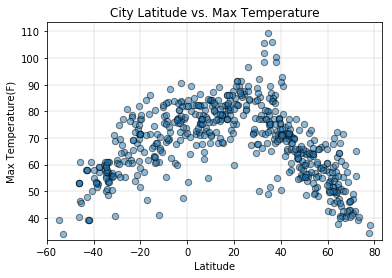

In [96]:
lat_temp_plot = city_df.plot(kind = "scatter", x = "Lat", y = "Max Temperature", edgecolors ="black", alpha = 0.5, s = 40)
lat_temp_plot.set_xlabel("Latitude")
lat_temp_plot.set_ylabel("Max Temperature(F)")
lat_temp_plot.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5)
lat_temp_plot.set_ylim(city_df["Max Temperature"].min()-2,city_df["Max Temperature"].max()+4)
lat_temp_plot.grid(linestyle='-', linewidth='0.2', color='grey')
lat_temp_plot.set_title("City Latitude vs. Max Temperature")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

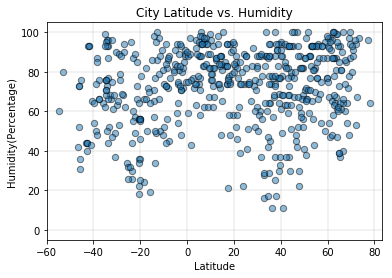

In [95]:
lat_hum_plot = city_df.plot(kind = "scatter", x = "Lat", y = "Humidity",edgecolors ="black", alpha = 0.5, s = 40)
lat_hum_plot.set_xlabel("Latitude")
lat_hum_plot.set_ylabel("Humidity(Percentage)")
lat_hum_plot.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5)
lat_hum_plot.set_ylim(-5,105)
lat_hum_plot.grid(linestyle='-', linewidth='0.2', color='grey')
lat_hum_plot.set_title("City Latitude vs. Humidity")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

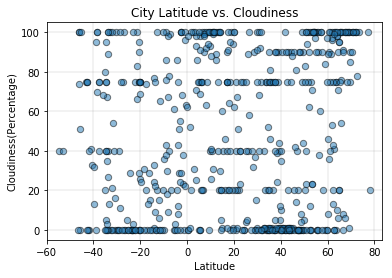

In [94]:
lat_cloud_plot =city_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", edgecolors ="black", alpha = 0.5, s = 40)
lat_cloud_plot.set_xlabel("Latitude")
lat_cloud_plot.set_ylabel("Cloudiness(Percentage)")
lat_cloud_plot.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5)
lat_cloud_plot.set_ylim(-5,105)
lat_cloud_plot.grid(linestyle='-', linewidth='0.2', color='grey')
lat_cloud_plot.set_title("City Latitude vs. Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

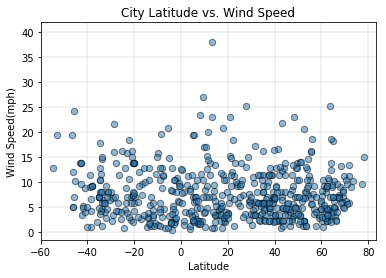

In [93]:
lat_ws_plot = city_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", edgecolors ="black", alpha = 0.5, s = 40)
lat_ws_plot.set_xlabel("Latitude")
lat_ws_plot.set_ylabel("Wind Speed(mph)")
lat_ws_plot.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5)
lat_ws_plot.set_ylim(city_df["Wind Speed"].min()-2,city_df["Wind Speed"].max()+4)
lat_ws_plot.grid(linestyle='-', linewidth='0.2', color='grey')
lat_ws_plot.set_title("City Latitude vs. Wind Speed")